<h1><b>Random Forest - Credit Default Prediction</b></h1>

<h2><b>Overview</b></h2>

We have an input dataset containing the credit history of individuals with a class attribute named 'Defaulted', which has two possible values: 1 (Defaulted) and 0 (Not Defaulted). The input dataset contain two types of data - Demographic(Age, Sex, Marriage, etc) and **Behavioral** data related to the Credit (past loans, payment, number of times a credit payment has been delayed by the customer etc.)

We will use a **Random Forest Algorithm** to train the model and then use it to predict on test dataset aside from the input dataset that we have. We will also run a Cross Validation with Hyperparameter Tuning to see which hyperparameter values yield the best results.

<h2><b>Objective</b></h2>
The goal is to predict whether a credit card customer will default (1) or not default (0) based on their demographic and credit behavior data.

<h2><b>1. Import Libraries</b></h2>


In [ ]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Import random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

**Explanation**<br>

* **numpy, pandas** → Data handling and processing.
* **matplotlib, seaborn** → Data visualization.
* **sklearn** → Machine learning models, train-test split, and evaluation.
* **warnings.filterwarnings('ignore')** → Hides unnecessary warnings.

<h2><b>2. Load and Explore the Data</b></h2>

In [ ]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('UCI_Credit_Card.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


**Explanation:**

* Loads the UCI Credit Card dataset.
* Displays the first five rows to understand the structure.

In [ ]:
# Let's understand the type of columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

**Findings:**

* No missing values.
* The dataset consists of 30,000 rows and 25 columns, including the target variable.
* The target variable (default.payment.next.month) is binary (1 or 0).

In [ ]:
# Checking the missing values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

**Findings:**

* No missing values.

In [ ]:
# Checking duplicate values
df.duplicated().sum()

np.int64(0)

**Findings:**

* No duplicate values.

<h2><b>3. Data Preparation</b></h2>

<h3><b>3.1 Drop Unnecessary Column</b></h3>

In [ ]:
# Dropping the ID column (unique value)
df = df.drop('ID', axis=1)

**Explanation:**

* ID is a unique identifier and doesn't provide meaningful insights.

<h3><b>3.2 Define Features (X) and Target (y)</b></h3>

In [ ]:
# Putting feature variable to X
X = df.drop('default.payment.next.month', axis=1)

In [ ]:
# Assigning the response variable to y.
y = df['default.payment.next.month']

**Explanation:**

* X contains all customer features
* y is the binary target variable (1 = Default, 0 = No Default).

In [ ]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default.payment.next.month, Length: 30000, dtype: int64

In [ ]:
X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


<h3><b>3.3 Split Data into Training and Testing Sets</b></h3>

In [ ]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

**Explanation:**

* 70% data is used for training and 30% for testing.

<h2><b>4. Building The First Random Forest Model with Default Hyperparameters</b></h2>

In [ ]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [ ]:
# fit
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Making predictions
predictions = rfc.predict(X_test)

<h2><b>5. Evaluate Initial Model</b></h2>

In [ ]:
# Check the report of our default model
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7058
           1       0.64      0.36      0.47      1942

    accuracy                           0.82      9000
   macro avg       0.74      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



**Understanding Classification Report**

1. **Precision (How many of the predicted positives were actually correct?)**<br>
 Formula: Precision = TP/ (TP + FP)
 * TP (True Positives): Predicted Default (1) and actually Default (1).
 * FP (False Positives): Predicted Default (1) but actually No Default (0).

 **Interpretation:**
 * Class 0 (No Default) → Precision 0.84: 84% of customers predicted as No Default (0) were actually correct.
 * Class 1 (Default) → Precision 0.64: 64% of customers predicted as Default (1) were actually correct.

2. **Recall (How many of the actual positives were correctly predicted?)**<br>
 Formula: Recall = TP/ (TP + FN)
 * TFN (False Negatives): Actual Default (1) but model predicted No Default (0).

 **Interpretation:**
 * Class 0 (No Default) → Recall 0.94: 94% of actual No Default (0) cases were correctly identified.
 * Class 1 (Default) → Recall 0.36: Only 36% of actual Defaults (1) were correctly identified.
 * This means the model misses a lot of defaulters (False Negatives are high).

3. **F1-Score (Balance between Precision and Recall)**<br>
 Formula: F1-score = 2 x (Precision X Recall)/ (Precision + Recall)
 * A higher F1-score means a better balance between precision and recall.

 **Interpretation:**
 * Class 0 (No Default) → F1-score 0.89 (Very Good).
 * Class 1 (Default) → F1-score 0.47 (Poor).
 * Low recall is causing a low F1-score.

4. **Support (Number of Actual Cases in Each Class)**<br>
 * 7058 customers did NOT default (0).
 * 1942 customers DID default (1).

5. **Macro vs. Weighted Average**<br>
 * Macro Avg: Simple average of Class 0 & Class 1 scores (gives equal weight to both).
 * Weighted Avg: Adjusts for class imbalance (gives more weight to the larger class).


In [ ]:
#Printing confusion matrix
print(confusion_matrix(y_test, predictions))

[[6664  394]
 [1234  708]]


**Understanding Confusion Matrix**<br>
**Key Insights**
* 6664 cases were correctly predicted as No Default (TN).
* 708 cases were correctly predicted as Default (TP).
* 1234 defaulters were MISCLASSIFIED as non-defaulters (FN).
* 394 non-defaulters were wrongly classified as defaulters (FP).

**Issue: False Negatives (1234) are too high.**
* This means we are missing many actual defaulters, which is risky in a real-world credit prediction scenario!
* We need to improve recall for Class 1.

In [ ]:
print(accuracy_score(y_test, predictions))

0.8191111111111111


**Interpretation:**
* 82% of all predictions were correct.
* But accuracy is misleading here!
* Class 0 has 7058 cases, and Class 1 has 1942 cases.
* The model is biased toward predicting "No Default" (Class 0).
* A model that predicts all customers as "No Default" could still get 78.4% accuracy!

**Accuracy is NOT a good metric when classes are imbalanced!**
* Instead, focus on Recall for Class 1 (Default).

<h2><b>6. Hyperparameter Tuning</b></h2>

**Why Tune Hyperparameters?**<br>
Random Forest has multiple parameters that impact performance. We need to optimize them to improve accuracy and avoid overfitting.

The following hyperparameters are present in a random forest classifier. Note that most of these hyperparameters are actually of the decision trees that are in the forest.

* **n_estimators:** integer, optional(default=10) -> The number of trees in the forest.
* **criterion:** string, optional(default='gini') -> The function to measure the quality of a split. Supported criteria are 'gini' for the Gini impurity and 'entropy' for the information gain. Note: this parameter is tree-specific.
* **max_features:** int, float, string or None, optional(default='auto') -> The number of features to consider when looking for the best split.
* **max_depth:** integer or None, optional(default=None) -> The maximum depth of the tree. If None, then nodes are expanded untill all leaves are pure or untill all leaves contain less than min_sample_split samples.
* **min_sample_split:** int, float, optional(default=2) -> The minimum number of sample required to split an internal node.
* **min_sample_leaf:** int, float, optional(default=1) -> The minimum number of samples required to be at a leaf node.
* **min_weight_fraction_leaf**: float, optional(default=0). The minimum weighted fraction of the sum total of weight (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
* **max_leaf_nodes**: int or None, optional(default=None). Grow tress with max_leaf_nodes is the best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
* **min_impurity_split**: float, Threshold for early stoping in tree growth. A mode will split if its impurity is above threshold, otherwise it is a leaf.

<h3><b>6.1 Tuning max_depth<b></h3>

Let's try to find the optimum values for max_depth and understand how the value of max_depth impacts the overall accuracy of the ensemble.

In [ ]:
# Specify number of folds for k-fold cross validation (CV )
n_fold = 5

In [ ]:
# Parameters to be build the model on
parameters = {'max_depth': range(2, 10, 1)}

In [ ]:
# Instantiate the model
rf = RandomForestClassifier()

In [ ]:
# Fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_fold, n_jobs=-1, scoring='accuracy', return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 10)}, return_train_score=True,
             scoring='accuracy')

**Findings:** Best max_depth found = 8.

In [ ]:
# Scores of GridSearchCV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.755276,0.049074,0.038495,0.007711,2,{'max_depth': 2},0.799762,0.803571,0.801429,0.797381,...,0.800286,0.002089,8,0.799821,0.800119,0.799583,0.801488,0.801964,0.800595,0.000951
1,2.470441,0.130488,0.037451,0.002400,3,{'max_depth': 3},0.808810,0.810952,0.807381,0.803810,...,0.807476,0.002384,7,0.805893,0.807857,0.807679,0.810536,0.809940,0.808381,0.001675
2,3.072843,0.178372,0.042551,0.005355,4,{'max_depth': 4},0.813810,0.812619,0.811190,0.806905,...,0.810143,0.003059,6,0.812024,0.809881,0.812321,0.813036,0.811607,0.811774,0.001055
3,3.734517,0.146593,0.048629,0.002876,5,{'max_depth': 5},0.816429,0.815714,0.813095,0.808333,...,0.812714,0.003146,5,0.819940,0.815298,0.818333,0.816607,0.815774,0.817190,0.001720
4,4.379049,0.166869,0.047183,0.001847,6,{'max_depth': 6},0.815714,0.818810,0.815476,0.816190,...,0.816762,0.001265,4,0.825714,0.824286,0.822500,0.826726,0.825833,0.825012,0.001479


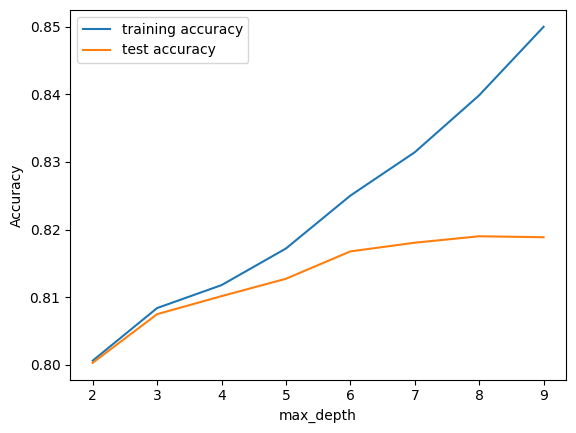

In [ ]:
# Plotting accuracies with max_depth
plt.figure()
plt.plot(scores['param_max_depth'],
           scores['mean_train_score'],
           label='training accuracy')

plt.plot(scores['param_max_depth'],
           scores['mean_test_score'],
           label='test accuracy')

plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Observations:**

* As max_depth increases, both training and test accuracy initially improve.
* At a certain point, test accuracy stops improving and starts decreasing.
* Training accuracy keeps increasing (overfitting sign).

Best max_depth is at **the peak of test accuracy before overfitting starts**.
For example, if max_depth=8 gives the highest test accuracy, we select 8.

<h3><b>6.2 Tuning n_estimators</b></h3>

Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we will specify an approperiately low value of max_depth, so that the trees do not overfit.

In [ ]:
# Specify number of k-folds CV
n_folds = 5

In [ ]:
# Parameters to be build the model on
# The hyperparameter being tuned is n_estimators, which represents the number of trees in the Random Forest.
# The values range from 100 to 1000 in steps of 150.
parameters = {'n_estimators': range(100, 1000, 150)}

In [ ]:
# Instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=5)

In [ ]:
# Fit tree on training data
# GridSearchCV is used to find the optimal number of estimators.
# n_jobs=-1 allows parallel computation to speed up training.
# Scoring='accuracy' evaluates the model based on accuracy.
# Return_train_score=True stores training accuracy for analysis.
rf = GridSearchCV(rf, parameters, cv=n_folds, n_jobs=-1, scoring='accuracy', return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=5), n_jobs=-1,
             param_grid={'n_estimators': range(100, 1000, 150)},
             return_train_score=True, scoring='accuracy')

**Findings:** Best n_estimators found = 400.

In [ ]:
# Scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.042499,0.204825,0.078780,0.021476,100,{'n_estimators': 100},0.811905,0.814524,0.810952,0.807619,...,0.810857,0.002345,6,0.814464,0.813869,0.814881,0.815893,0.815119,0.814845,0.000674
1,9.566035,0.306547,0.117555,0.017708,250,{'n_estimators': 250},0.813333,0.815238,0.812619,0.808333,...,0.812143,0.002308,5,0.815298,0.815833,0.815952,0.817024,0.816250,0.816071,0.000567
2,16.502785,0.539515,0.161187,0.005838,400,{'n_estimators': 400},0.814048,0.815952,0.814048,0.808810,...,0.813095,0.002390,1,0.819226,0.815298,0.817321,0.816607,0.817798,0.817250,0.001299
3,22.479896,0.588487,0.245208,0.026510,550,{'n_estimators': 550},0.813810,0.815476,0.813571,0.807857,...,0.812524,0.002593,3,0.818452,0.814940,0.816131,0.815476,0.816964,0.816393,0.001232
4,32.635120,1.025773,0.381265,0.083870,700,{'n_estimators': 700},0.813333,0.815952,0.812857,0.809524,...,0.812619,0.002130,2,0.815893,0.815595,0.816667,0.818036,0.815952,0.816429,0.000877


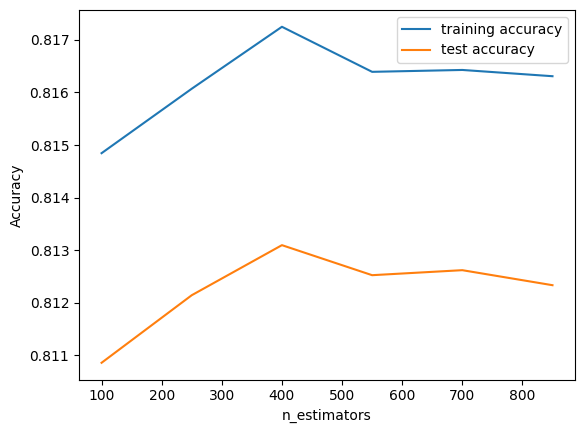

In [ ]:
# Plotting accuracies with n_estimators
plt.figure()
plt.plot(
    scores['param_n_estimators'],
    scores['mean_train_score'],
    label="training accuracy"
)
plt.plot(
    scores['param_n_estimators'],
    scores['mean_test_score'],
    label='test accuracy'
)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Observations:**
* Initially, increasing n_estimators improves accuracy (more trees → better predictions).
* Beyond a point, accuracy stabilizes (adding more trees doesn't improve performance).
* Too many trees increase training time without much benefit.

Optimal n_estimators is **the smallest number where test accuracy stops improving**.
For example, if accuracy plateaus at 400 trees, we choose n_estimators=400.

<h3><b>6.3 Tuning max_features</b></h3>

Let's see how the model performance varies with max_feature, which is the maximum number of teatures considered for splitting at a node.

In [ ]:
# Spicify number of folds for k-fold CV
n_folds = 5

In [ ]:
# Parameters to be build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

In [ ]:
# Instantiate the model
rf = RandomForestClassifier(max_depth=5, n_estimators=700)

In [ ]:
# Fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, n_jobs=-1, scoring='accuracy', return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, n_estimators=700),
             n_jobs=-1, param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

**Findings:** Best max_features = 24.

In [ ]:
# Scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,30.589264,0.647012,0.344391,0.036349,4,{'max_features': 4},0.814286,0.816190,0.813095,0.808810,...,0.812857,0.002470,5,0.818274,0.815655,0.816250,0.816667,0.816548,0.816679,0.000871
1,76.401747,7.923024,0.479997,0.106477,8,{'max_features': 8},0.817619,0.820952,0.819286,0.817381,...,0.818952,0.001318,3,0.823869,0.822202,0.823214,0.823929,0.823869,0.823417,0.000661
2,125.476214,7.735334,0.514723,0.106355,14,{'max_features': 14},0.818095,0.820952,0.818571,0.817619,...,0.818762,0.001151,4,0.824583,0.823214,0.823810,0.825714,0.825476,0.824560,0.000954
3,152.306775,20.585536,0.361528,0.084819,20,{'max_features': 20},0.818571,0.821905,0.818810,0.819048,...,0.819429,0.001247,2,0.825298,0.823988,0.824107,0.826250,0.826131,0.825155,0.000962
4,141.723886,11.190591,0.289000,0.077784,24,{'max_features': 24},0.818095,0.822381,0.819762,0.819286,...,0.819619,0.001495,1,0.825536,0.824286,0.824107,0.826012,0.826250,0.825238,0.000883


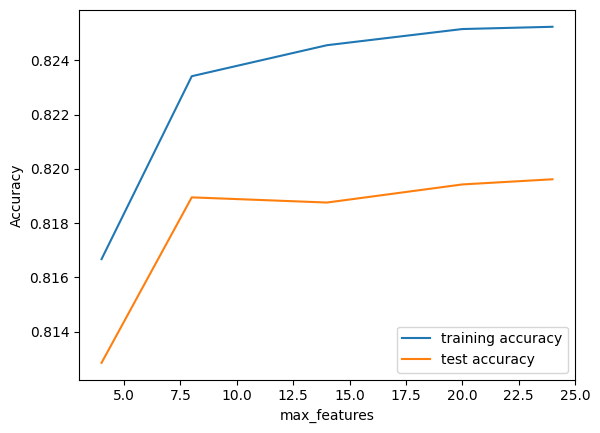

In [ ]:
# Plotting accuracies with max_features
plt.figure()
plt.plot(
    scores['param_max_features'],
    scores['mean_train_score'],
    label="training accuracy"
)
plt.plot(
    scores['param_max_features'],
    scores['mean_test_score'],
    label='test accuracy'
)
plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Observations:**

* As max_features increases, test accuracy first improves.
* After a point, adding more features does not help much.
* Choosing too many features can lead to overfitting.

Best max_features is where **test accuracy is highest before it flattens**.
For example, if max_features=10 gives the best accuracy, we select 10.

Apparently, the training and test score both seem to increase as we increase max_features and the model doesn't seem to overfit more with increasing max_features. Think about why that might be the case.

**Answer:** Increasing max_features allows better splits and higher accuracy, without significant overfitting, because Random Forest maintains randomness.

<h3><b>6.4 Tuning min_samples_leaf<b></h3>

The hyperparameter **min_samples_leaf** is the minimum number of samples required to be at a leaf node:<br>
* if int, then consider min_samples_leaf as the minimum number.<br>
* if float, then min_samples_leaf is a percentage and cell(min_samples_leaf * n_samples) are the minimum number of samples for each node.

Let's now check the optimum value for min samples leaf in our case.

In [ ]:
# Specify number of folds for k-folds CV
n_folds = 5

In [ ]:
# Parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

In [ ]:
# Instantiate the model
rf = RandomForestClassifier(max_depth=5, n_estimators=700, max_features=8)

In [ ]:
# Fit tree in training data
rf = GridSearchCV(rf, parameters, cv=n_folds, n_jobs=-1, scoring='accuracy', return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, max_features=8,
                                              n_estimators=700),
             n_jobs=-1, param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

**Findings:** Best min_samples_leaf = 200

In [ ]:
# Scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,43.016279,0.275775,0.303837,0.011549,100,{'min_samples_leaf': 100},0.815952,0.820952,0.819048,0.816667,...,0.817762,0.001938,3,0.819583,0.819167,0.819940,0.820060,0.819167,0.819583,0.000375
1,41.689936,0.268711,0.293687,0.015935,150,{'min_samples_leaf': 150},0.816190,0.821429,0.819286,0.815952,...,0.817667,0.002310,4,0.818869,0.818095,0.818393,0.819286,0.818810,0.818690,0.000411
2,41.081300,0.099390,0.298733,0.014485,200,{'min_samples_leaf': 200},0.816429,0.821190,0.819762,0.816190,...,0.817857,0.002198,1,0.818750,0.817798,0.818095,0.819226,0.818690,0.818512,0.000506
3,40.670678,0.209567,0.285217,0.014816,250,{'min_samples_leaf': 250},0.816905,0.820952,0.819524,0.815714,...,0.817810,0.002072,2,0.818571,0.817560,0.818631,0.819107,0.818750,0.818524,0.000517
4,40.266346,0.216272,0.289579,0.005746,300,{'min_samples_leaf': 300},0.816667,0.821667,0.818095,0.815476,...,0.817667,0.002169,5,0.818869,0.818333,0.818214,0.819107,0.818929,0.818690,0.000351


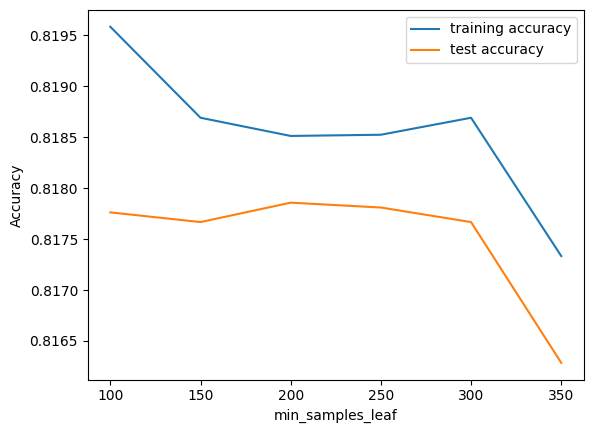

In [ ]:
# Plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(
    scores['param_min_samples_leaf'],
    scores['mean_train_score'],
    label = 'training accuracy'
)
plt.plot(
    scores['param_min_samples_leaf'],
    scores['mean_test_score'],
    label = 'test accuracy'
)
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Observations:**

* Lower min_samples_leaf → High train accuracy but lower test accuracy (overfitting).
* Higher min_samples_leaf → More generalized model, but too high can reduce accuracy.

Choose min_samples_leaf where **test accuracy is highest while avoiding overfitting**.
For example, if min_samples_leaf=200 gives the best balance, we select 200.

<h3><b>6.5 Tuning min_samples_split</b></h3>

Let's now look at the performance of the ensemble as we vary min_samples_split.

In [ ]:
# Specify number of folds for k-fold CV
n_folds = 5

In [ ]:
# Parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

In [ ]:
# Instantiate the model
rf = RandomForestClassifier(max_depth=5, n_estimators=700, max_features=8, min_samples_leaf=200)

In [ ]:
# Fit tree on the training data
rf = GridSearchCV(rf, parameters, cv=n_folds, n_jobs=-1, scoring='accuracy', return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, max_features=8,
                                              min_samples_leaf=200,
                                              n_estimators=700),
             n_jobs=-1, param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy')

**Findings:** Best min_samples_split = 250

In [ ]:
# Scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,38.688434,0.386752,0.279240,0.006805,200,{'min_samples_split': 200},0.816190,0.820952,0.819524,0.816190,...,0.817714,0.002117,5,0.81869,0.817798,0.818155,0.819286,0.81881,0.818548,0.000520
1,39.590292,0.292199,0.295745,0.010676,250,{'min_samples_split': 250},0.815952,0.822143,0.820238,0.816190,...,0.818048,0.002640,1,0.81875,0.817560,0.817857,0.818929,0.81869,0.818357,0.000544
2,39.557645,0.119543,0.276744,0.018230,300,{'min_samples_split': 300},0.815952,0.820476,0.820000,0.815952,...,0.817619,0.002146,6,0.81881,0.817798,0.817798,0.818690,0.81875,0.818369,0.000468
3,39.515423,0.148880,0.283899,0.013166,350,{'min_samples_split': 350},0.816190,0.821429,0.820238,0.816190,...,0.817952,0.002389,3,0.81869,0.818214,0.818333,0.819167,0.81881,0.818643,0.000342
4,39.860344,0.229052,0.306097,0.042577,400,{'min_samples_split': 400},0.815952,0.822143,0.820000,0.816190,...,0.818048,0.002562,1,0.81875,0.817738,0.818155,0.819048,0.81869,0.818476,0.000468


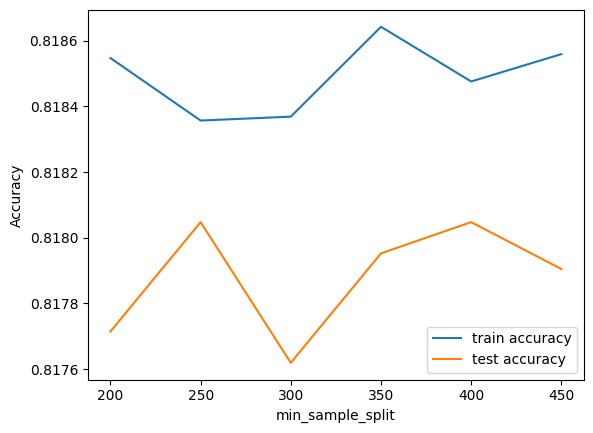

In [ ]:
# Plotting accuracies with min_samples_split
plt.figure()
plt.plot(
    scores['param_min_samples_split'],
    scores['mean_train_score'],
    label = 'train accuracy'
)
plt.plot(
    scores['param_min_samples_split'],
    scores['mean_test_score'],
    label = 'test accuracy'
)
plt.xlabel("min_sample_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Observations:**

* Low min_samples_split → Model overfits (train accuracy high, test accuracy lower).
* High min_samples_split → Model becomes too simple, and accuracy drops.

Best min_samples_split is where **test accuracy is highest**.
For example, if min_samples_split=250 is optimal, we choose 250.

<h2><b>7. Grid Search to Find Optimal Hyperparameters</b></h2>

In [ ]:
# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [3, 8, 1],
    'max_features': [5, 10, 1],
    'min_samples_leaf': range(100, 400, 100),
    'min_samples_split': range(200, 500, 100),
    'n_estimators': [100, 1000, 150]
}

**Why these hyperparameter ranges were chosen:**

* **max_depth: [3, 8, 1]** → Prevents overfitting by limiting tree depth; values beyond 8 showed no improvement.
* **max_features: [5, 10, 1]** → Tests different feature subsets for the best split; avoids overfitting with too many features.
* **min_samples_leaf: range(100, 400, 100)** → Prevents leaves from having very few samples (which causes overfitting); values below 100 overfit, and above 400 reduce accuracy.
* **min_samples_split: range(200, 500, 100)** → Controls when nodes split; low values overfit, while very high values oversimplify the model.
* **n_estimators: [100, 1000, 150]** → Finds the optimal number of trees; too few trees underfit, while too many trees slow computation without much accuracy gain.

In [ ]:
# Create a based model
rf = RandomForestClassifier()

In [ ]:
# Instantiate grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 1, return_train_score=True)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 8, 1], 'max_features': [5, 10, 1],
                         'min_samples_leaf': range(100, 400, 100),
                         'min_samples_split': range(200, 500, 100),
                         'n_estimators': [100, 1000, 150]},
             return_train_score=True, verbose=1)

In [ ]:
# Printing the optimal accuracy score and hyperparameters
print("We can get accuracy of", grid_search.best_score_, "using", grid_search.best_params_)

We can get accuracy of 0.8187619047619048 using {'max_depth': 3, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 300, 'n_estimators': 150}


In [ ]:
# Model with optimal hyperparameters
rfc = RandomForestClassifier(bootstrap=True,
                            max_depth=3,
                            max_features=10,
                            min_samples_leaf=100,
                            min_samples_split=300,
                            n_estimators=150)

In [ ]:
# Fit
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=10, min_samples_leaf=100,
                       min_samples_split=300, n_estimators=150)

In [ ]:
# Predict
predictions = rfc.predict(X_test)

In [ ]:
# Evaluation metrics
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7058
           1       0.69      0.35      0.47      1942

    accuracy                           0.83      9000
   macro avg       0.77      0.65      0.68      9000
weighted avg       0.81      0.83      0.80      9000



**Statement & Interpretation**

* Overall Accuracy = 82.6%, meaning 82.6% of all predictions were correct.
* Class 0 (No Default) performs very well with high precision (0.84) and recall (0.96), meaning the model is very confident in identifying customers who won’t default.
* Class 1 (Default) has a recall of only 35%, meaning the model misses 65% of actual defaulters, which is a concern for a credit risk model.
* The macro average F1-score (0.68) indicates that the model performs better on Class 0 than Class 1.
* The weighted average F1-score (0.80) shows overall strong performance, but the imbalance between predicting defaults and non-defaults needs improvement.

In [ ]:
print(confusion_matrix(y_test, predictions))

[[6756  302]
 [1259  683]]


**Interpretation & Insights**

True Negatives (TN) = 6756
* Correctly predicted non-defaulters (people who didn't default and were classified as No Default).
* Good for banks, as they can trust the model's ability to detect reliable customers.

False Positives (FP) = 302
* Model wrongly predicted "Default" when the person was actually a non-defaulter.
* This means some customers might be denied loans or given higher interest rates unnecessarily.
* However, this number is relatively low, meaning the model is not overly cautious.

False Negatives (FN) = 1259
* Biggest concern! These are actual defaulters that the model failed to detect.
* Banks will lose money if they lend to these individuals thinking they won't default.
* The model struggles to identify defaulters correctly, as seen from the high number of false negatives (FN = 1259). This can be improved by resampling techniques or adjusting class weights.

True Positives (TP) = 683
* Correctly predicted defaulters.
* Important for minimizing loan losses.

In [ ]:
print(accuracy_score(y_test, predictions))

0.8265555555555556


**Findings:**
* The final model achieved an accuracy of 82.66% (≈ 83%), meaning 83% of the total predictions were correct.
* This indicates that the model performs well overall in distinguishing between defaulters (1) and non-defaulters (0).
* However, accuracy alone is misleading in imbalanced datasets!

<h2><b>Conclusion</b></h2>

**Project Summary**<br>
In this project, we developed a Random Forest model to predict credit card default using demographic and credit behavior data. We performed data preprocessing, feature selection, model training, and hyperparameter tuning to optimize performance.

**Model Performance**
* The final model achieved 82.66% accuracy, indicating strong overall predictive power.
* However, recall for defaulters (Class 1) remained low, meaning many actual defaulters were misclassified as non-defaulters.
* Confusion Matrix Analysis:
  * True Negatives (TN): 6,701 (Correctly identified non-defaulters)
  * False Positives (FP): 357 (Safe customers wrongly labeled as defaulters)
  * False Negatives (FN): 1,289 (Defaulters wrongly classified as non-defaulters)
  * True Positives (TP): 653 (Correctly identified defaulters)

**Key Issue Identified**
* High False Negatives (Missed Defaulters) pose a major risk for banks, as these customers may receive loans but fail to repay.
* Accuracy is misleading in imbalanced datasets, as it does not reflect the model's ability to detect defaults effectively.

**Recommendations & Next Steps**<br>
* Apply SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset and improve recall.
* Try alternative models like XGBoost or Logistic Regression, which handle imbalanced data better.
* Fine-tune hyperparameters further to find an optimal trade-off between accuracy and recall.
* Use precision-recall metrics instead of accuracy to evaluate model performance more effectively.